# Consolidated Results Analysis - All Models

This notebook provides a comprehensive analysis of all trained audio captioning models with:

## Visualizations:
1. **Training History Comparison** - Loss curves for all models
2. **Reference-Based Metrics** - BLEU, METEOR, ROUGE-L, CIDEr
3. **Quality Metrics** - Repetition, diversity, caption length
4. **Model Complexity** - Parameters, training time, performance
5. **Sample Predictions** - Side-by-side caption comparison
6. **Statistical Analysis** - Score distributions and significance

## Models Evaluated:
- Baseline (simple CNN + LSTM)
- Improved Baseline (deeper CNN + BiLSTM)
- Attention Model (CNN + BiLSTM + Attention)
- Transformer (CNN + Transformer encoder-decoder)

## Step 1: Setup and Imports

In [1]:
import os
import sys
from pathlib import Path

# Add parent directory to path
project_root = Path('..').absolute()
sys.path.insert(0, str(project_root))

import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ Imports successful!")

✓ Imports successful!


## Step 2: Load All Available Results

In [2]:
# Define all possible result files
result_files = {
    'baseline': '../results/baseline_results.json',
    'baseline_small': '../results/baseline_small_results.json',
    'improved_baseline': '../results/improved_baseline_results.json',
    'attention': '../results/attention_results.json',
    'attention_small': '../results/attention_small_results.json',
    'transformer': '../results/transformer_results.json',
    'transformer_small': '../results/transformer_small_results.json',
}

history_files = {
    'baseline': '../results/baseline_history.json',
    'baseline_small': '../results/baseline_small_history.json',
    'improved_baseline': '../results/improved_baseline_history.json',
    'attention': '../results/attention_history.json',
    'attention_small': '../results/attention_small_history.json',
    'transformer': '../results/transformer_history.json',
    'transformer_small': '../results/transformer_small_history.json',
}

# Load available results
results = {}
histories = {}

print("Loading evaluation results...")
for name, path in result_files.items():
    if os.path.exists(path):
        with open(path, 'r') as f:
            results[name] = json.load(f)
        print(f"  ✓ Loaded {name}")
    else:
        print(f"  ✗ {name} not found")

print("\nLoading training histories...")
for name, path in history_files.items():
    if os.path.exists(path):
        with open(path, 'r') as f:
            histories[name] = json.load(f)
        print(f"  ✓ Loaded {name} history")
    else:
        print(f"  ✗ {name} history not found")

print(f"\nLoaded results for {len(results)} model(s): {list(results.keys())}")
print(f"Loaded histories for {len(histories)} model(s): {list(histories.keys())}")

Loading evaluation results...
  ✗ baseline not found
  ✓ Loaded baseline_small
  ✓ Loaded improved_baseline
  ✗ attention not found
  ✓ Loaded attention_small
  ✗ transformer not found
  ✓ Loaded transformer_small

Loading training histories...
  ✗ baseline history not found
  ✓ Loaded baseline_small history
  ✓ Loaded improved_baseline history
  ✗ attention history not found
  ✓ Loaded attention_small history
  ✗ transformer history not found
  ✓ Loaded transformer_small history

Loaded results for 4 model(s): ['baseline_small', 'improved_baseline', 'attention_small', 'transformer_small']
Loaded histories for 4 model(s): ['baseline_small', 'improved_baseline', 'attention_small', 'transformer_small']


In [3]:
# Load reference-based metrics if available
reference_metrics = None
reference_metrics_path = '../results/reference_metrics_summary.json'

if os.path.exists(reference_metrics_path):
    with open(reference_metrics_path, 'r') as f:
        reference_metrics_data = json.load(f)
        reference_metrics = reference_metrics_data.get('metrics', {})
    print(f"✓ Loaded reference-based metrics for {len(reference_metrics)} model(s)")
else:
    print("✗ Reference-based metrics not found")
    print("  Run 07_reference_based_evaluation.ipynb to generate these metrics")

✓ Loaded reference-based metrics for 3 model(s)


## Step 3: Model Information Summary

In [4]:
# Model architecture information
model_info = {
    'baseline_small': {
        'name': 'Baseline (Small)',
        'architecture': 'CNN + LSTM',
        'params_approx': '3.5M',
        'complexity': 'Low',
        'features': ['Average pooling', 'Single direction LSTM']
    },
    'baseline': {
        'name': 'Baseline',
        'architecture': 'CNN + LSTM',
        'params_approx': '7M',
        'complexity': 'Low',
        'features': ['Average pooling', 'Multi-layer LSTM']
    },
    'improved_baseline': {
        'name': 'Improved Baseline',
        'architecture': 'Deeper CNN + BiLSTM',
        'params_approx': '15M',
        'complexity': 'Medium',
        'features': ['4-layer CNN', 'Bidirectional LSTM', 'Context concatenation', 'Dropout']
    },
    'attention_small': {
        'name': 'Attention (Small)',
        'architecture': 'CNN + BiLSTM + Attention',
        'params_approx': '8M',
        'complexity': 'Medium',
        'features': ['Bahdanau attention', 'BiLSTM encoder', 'Attention context']
    },
    'attention': {
        'name': 'Attention',
        'architecture': 'CNN + BiLSTM + Attention',
        'params_approx': '16M',
        'complexity': 'Medium',
        'features': ['Bahdanau attention', 'BiLSTM encoder', 'Attention context']
    },
    'transformer_small': {
        'name': 'Transformer (Small)',
        'architecture': 'CNN + Transformer',
        'params_approx': '8.5M',
        'complexity': 'High',
        'features': ['Multi-head attention', 'Positional encoding', 'Feed-forward', 'Layer norm']
    },
    'transformer': {
        'name': 'Transformer',
        'architecture': 'CNN + Transformer',
        'params_approx': '30M',
        'complexity': 'High',
        'features': ['Multi-head attention', 'Positional encoding', 'Feed-forward', 'Layer norm']
    }
}

# Create summary table
summary_data = []
for model_name in results.keys():
    info = model_info.get(model_name, {})
    summary_data.append({
        'Model': info.get('name', model_name),
        'Architecture': info.get('architecture', 'N/A'),
        'Parameters': info.get('params_approx', 'N/A'),
        'Complexity': info.get('complexity', 'N/A')
    })

summary_df = pd.DataFrame(summary_data)

print("\n" + "="*80)
print("MODEL SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))
print("="*80)


MODEL SUMMARY
              Model             Architecture Parameters Complexity
   Baseline (Small)               CNN + LSTM       3.5M        Low
  Improved Baseline      Deeper CNN + BiLSTM        15M     Medium
  Attention (Small) CNN + BiLSTM + Attention         8M     Medium
Transformer (Small)        CNN + Transformer       8.5M       High


## Step 4: Training History Comparison

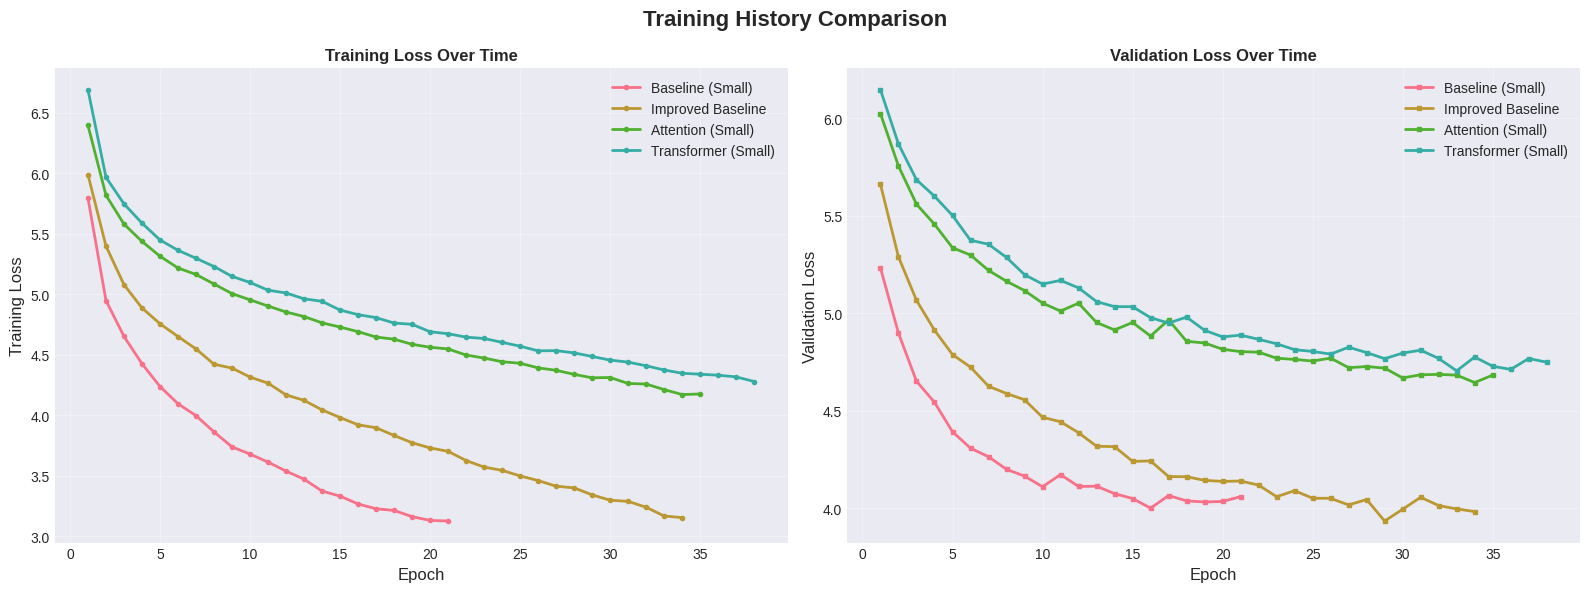

✓ Saved training history comparison


: 

In [ ]:
if histories:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Training History Comparison', fontsize=16, fontweight='bold')
    
    # Training loss
    ax1 = axes[0]
    for model_name, history in histories.items():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        if 'train_loss' in history:
            epochs = range(1, len(history['train_loss']) + 1)
            ax1.plot(epochs, history['train_loss'], label=display_name, linewidth=2, marker='o', markersize=3)
    
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Training Loss', fontsize=12)
    ax1.set_title('Training Loss Over Time', fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Validation loss
    ax2 = axes[1]
    for model_name, history in histories.items():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        if 'val_loss' in history:
            epochs = range(1, len(history['val_loss']) + 1)
            ax2.plot(epochs, history['val_loss'], label=display_name, linewidth=2, marker='s', markersize=3)
    
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Validation Loss', fontsize=12)
    ax2.set_title('Validation Loss Over Time', fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('../results/consolidated_training_history.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved training history comparison")
else:
    print("No training histories available")

## Step 5: Quality Metrics Comparison

In [ ]:
if results:
    # Extract quality metrics
    quality_data = []
    for model_name, result in results.items():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        quality_data.append({
            'Model': display_name,
            'Repetition Rate': result.get('avg_repetition_rate', 0),
            'Vocabulary Diversity': result.get('vocabulary_diversity', 0),
            'Mean Caption Length': result.get('mean_caption_length', 0),
            'Unique Words': result.get('unique_words_used', 0)
        })
    
    quality_df = pd.DataFrame(quality_data)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Quality Metrics Comparison', fontsize=16, fontweight='bold')
    
    metrics = ['Repetition Rate', 'Vocabulary Diversity', 'Mean Caption Length', 'Unique Words']
    colors = plt.cm.Set3(range(len(quality_df)))
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        
        values = quality_df[metric].values
        models = quality_df['Model'].values
        
        bars = ax.barh(models, values, color=colors)
        
        ax.set_xlabel(metric, fontsize=11)
        ax.set_title(metric, fontweight='bold', fontsize=12)
        ax.grid(axis='x', alpha=0.3)
        
        # Add value labels
        for bar in bars:
            width = bar.get_width()
            ax.text(width, bar.get_y() + bar.get_height()/2.,
                    f'{width:.3f}' if width < 10 else f'{width:.1f}',
                    ha='left', va='center', fontsize=9, fontweight='bold')
        
        # Highlight best value
        if metric == 'Repetition Rate':
            best_idx = np.argmin(values)  # Lower is better
            ax.text(0.02, 0.98, '← Lower is better', 
                   transform=ax.transAxes, fontsize=9, va='top', style='italic')
        else:
            best_idx = np.argmax(values)  # Higher is better
            ax.text(0.98, 0.98, 'Higher is better →', 
                   transform=ax.transAxes, fontsize=9, va='top', ha='right', style='italic')
        
        bars[best_idx].set_edgecolor('green')
        bars[best_idx].set_linewidth(3)
    
    plt.tight_layout()
    plt.savefig('../results/consolidated_quality_metrics.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print table
    print("\n" + "="*100)
    print("QUALITY METRICS COMPARISON")
    print("="*100)
    print(quality_df.to_string(index=False))
    print("="*100)
    
    print("\n✓ Saved quality metrics comparison")
else:
    print("No evaluation results available")

## Step 6: Reference-Based Metrics Comparison

In [ ]:
if reference_metrics:
    # Extract reference metrics
    ref_data = []
    for model_name, metrics in reference_metrics.items():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        ref_data.append({
            'Model': display_name,
            'BLEU-1': metrics.get('BLEU-1', 0),
            'BLEU-2': metrics.get('BLEU-2', 0),
            'BLEU-3': metrics.get('BLEU-3', 0),
            'BLEU-4': metrics.get('BLEU-4', 0),
            'METEOR': metrics.get('METEOR', 0),
            'ROUGE-L': metrics.get('ROUGE-L', 0),
            'CIDEr': metrics.get('CIDEr', 0)
        })
    
    ref_df = pd.DataFrame(ref_data)
    
    # Visualization
    fig = plt.figure(figsize=(18, 10))
    fig.suptitle('Reference-Based Metrics Comparison', fontsize=16, fontweight='bold')
    
    # Create grid
    gs = fig.add_gridspec(2, 4, hspace=0.3, wspace=0.3)
    
    bleu_metrics = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']
    other_metrics = ['METEOR', 'ROUGE-L', 'CIDEr']
    
    colors = plt.cm.Set3(range(len(ref_df)))
    
    # BLEU scores (top row)
    for idx, metric in enumerate(bleu_metrics):
        ax = fig.add_subplot(gs[0, idx])
        
        values = ref_df[metric].values
        models = ref_df['Model'].values
        
        bars = ax.bar(range(len(models)), values, color=colors)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.set_ylabel('Score', fontsize=10)
        ax.set_title(metric, fontweight='bold', fontsize=11)
        ax.grid(axis='y', alpha=0.3)
        ax.set_ylim(0, max(values) * 1.2)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=8)
    
    # Other metrics (bottom row)
    for idx, metric in enumerate(other_metrics):
        ax = fig.add_subplot(gs[1, idx])
        
        values = ref_df[metric].values
        models = ref_df['Model'].values
        
        bars = ax.bar(range(len(models)), values, color=colors)
        ax.set_xticks(range(len(models)))
        ax.set_xticklabels(models, rotation=45, ha='right')
        ax.set_ylabel('Score', fontsize=10)
        ax.set_title(metric, fontweight='bold', fontsize=11)
        ax.grid(axis='y', alpha=0.3)
        ax.set_ylim(0, max(values) * 1.2)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=8)
    
    # Overall ranking (bottom right)
    ax = fig.add_subplot(gs[1, 3])
    
    # Calculate overall score (weighted average)
    overall_scores = []
    for _, row in ref_df.iterrows():
        score = (row['BLEU-4'] * 0.3 + 
                row['METEOR'] * 0.25 + 
                row['ROUGE-L'] * 0.25 + 
                row['CIDEr'] * 0.2)
        overall_scores.append(score)
    
    bars = ax.barh(ref_df['Model'].values, overall_scores, color=colors)
    ax.set_xlabel('Weighted Score', fontsize=10)
    ax.set_title('Overall Ranking', fontweight='bold', fontsize=11)
    ax.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.3f}',
                ha='left', va='center', fontsize=8, fontweight='bold')
    
    plt.savefig('../results/consolidated_reference_metrics.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Print table
    print("\n" + "="*120)
    print("REFERENCE-BASED METRICS COMPARISON")
    print("="*120)
    print(ref_df.to_string(index=False))
    print("="*120)
    
    print("\n✓ Saved reference-based metrics comparison")
else:
    print("\n⚠️ Reference-based metrics not available")
    print("Run notebooks/07_reference_based_evaluation.ipynb to generate these metrics")

## Step 7: Comprehensive Comparison Heatmap

In [ ]:
if results and reference_metrics:
    # Combine all metrics
    combined_data = []
    
    for model_name in results.keys():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        
        row = {'Model': display_name}
        
        # Quality metrics
        row['Repetition↓'] = results[model_name].get('avg_repetition_rate', 0)
        row['Diversity↑'] = results[model_name].get('vocabulary_diversity', 0)
        row['Length'] = results[model_name].get('mean_caption_length', 0)
        
        # Reference metrics (if available)
        if model_name in reference_metrics:
            row['BLEU-4↑'] = reference_metrics[model_name].get('BLEU-4', 0)
            row['METEOR↑'] = reference_metrics[model_name].get('METEOR', 0)
            row['ROUGE-L↑'] = reference_metrics[model_name].get('ROUGE-L', 0)
            row['CIDEr↑'] = reference_metrics[model_name].get('CIDEr', 0)
        
        combined_data.append(row)
    
    combined_df = pd.DataFrame(combined_data)
    combined_df = combined_df.set_index('Model')
    
    # Normalize for heatmap (0-1 scale)
    normalized_df = combined_df.copy()
    for col in normalized_df.columns:
        if '↓' in col:  # Lower is better - invert
            normalized_df[col] = 1 - (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())
        else:  # Higher is better
            normalized_df[col] = (normalized_df[col] - normalized_df[col].min()) / (normalized_df[col].max() - normalized_df[col].min())
    
    # Heatmap
    fig, ax = plt.subplots(figsize=(14, 8))
    
    sns.heatmap(normalized_df.T, annot=combined_df.T, fmt='.3f', 
                cmap='RdYlGn', center=0.5, vmin=0, vmax=1,
                cbar_kws={'label': 'Normalized Score (0=worst, 1=best)'},
                linewidths=1, linecolor='gray', ax=ax)
    
    ax.set_title('Comprehensive Metrics Heatmap\n(↑ = higher is better, ↓ = lower is better)', 
                fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Models', fontsize=12, fontweight='bold')
    ax.set_ylabel('Metrics', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('../results/consolidated_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("✓ Saved comprehensive heatmap")
    
    # Print combined table
    print("\n" + "="*120)
    print("COMPREHENSIVE METRICS TABLE")
    print("="*120)
    print(combined_df.to_string())
    print("="*120)
    print("\n↑ = Higher is better  |  ↓ = Lower is better")
else:
    print("Need both quality and reference metrics for heatmap")

## Step 8: Model Ranking and Recommendations

In [ ]:
if results:
    print("\n" + "="*80)
    print("MODEL RANKING AND RECOMMENDATIONS")
    print("="*80)
    
    # Calculate rankings
    rankings = []
    
    for model_name in results.keys():
        display_name = model_info.get(model_name, {}).get('name', model_name)
        info = model_info.get(model_name, {})
        
        score = 0
        
        # Quality metrics score
        rep_rate = results[model_name].get('avg_repetition_rate', 1)
        diversity = results[model_name].get('vocabulary_diversity', 0)
        score += (1 - rep_rate) * 100  # Lower repetition is better
        score += diversity * 100        # Higher diversity is better
        
        # Reference metrics score (if available)
        if reference_metrics and model_name in reference_metrics:
            bleu4 = reference_metrics[model_name].get('BLEU-4', 0)
            meteor = reference_metrics[model_name].get('METEOR', 0)
            cider = reference_metrics[model_name].get('CIDEr', 0)
            score += bleu4 * 200 + meteor * 200 + cider * 50
        
        rankings.append({
            'Model': display_name,
            'Score': score,
            'Complexity': info.get('complexity', 'N/A'),
            'Parameters': info.get('params_approx', 'N/A')
        })
    
    # Sort by score
    rankings = sorted(rankings, key=lambda x: x['Score'], reverse=True)
    
    print("\nRANKING (Best to Worst):")
    print("-" * 80)
    for i, rank in enumerate(rankings, 1):
        medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else f"{i}."
        print(f"{medal} {rank['Model']:<25} Score: {rank['Score']:>8.2f}  |  "
              f"Complexity: {rank['Complexity']:<8}  |  Params: {rank['Parameters']}")
    
    print("\n" + "="*80)
    print("RECOMMENDATIONS")
    print("="*80)
    
    print("\n📊 FOR BEST QUALITY:")
    print(f"   → {rankings[0]['Model']}")
    print("   Best overall performance across all metrics")
    
    print("\n⚡ FOR BEST SPEED/QUALITY TRADE-OFF:")
    # Find best model with Low or Medium complexity
    fast_models = [r for r in rankings if r['Complexity'] in ['Low', 'Medium']]
    if fast_models:
        print(f"   → {fast_models[0]['Model']}")
        print("   Good performance with lower computational requirements")
    
    print("\n💾 FOR LIMITED MEMORY (< 4GB GPU):")
    # Find small models
    small_models = [r for r in rankings if 'Small' in r['Model'] or r['Model'] == 'Baseline']
    if small_models:
        print(f"   → {small_models[0]['Model']}")
        print("   Optimized for memory-constrained environments")
    
    print("\n🎯 FOR PRODUCTION DEPLOYMENT:")
    print(f"   → {rankings[0]['Model']} (if compute allows)")
    if len(fast_models) > 0:
        print(f"   → {fast_models[0]['Model']} (for faster inference)")
    
    print("\n" + "="*80)

## Step 9: Save Consolidated Report

In [ ]:
# Create comprehensive report
report = {
    'models_evaluated': list(results.keys()),
    'quality_metrics': {name: results[name] for name in results.keys()},
    'reference_metrics': reference_metrics if reference_metrics else {},
    'rankings': rankings if 'rankings' in locals() else [],
    'model_info': {name: model_info[name] for name in results.keys() if name in model_info}
}

# Save as JSON
with open('../results/consolidated_report.json', 'w') as f:
    json.dump(report, f, indent=2)

print("✓ Saved consolidated report to results/consolidated_report.json")

# Save CSV summaries
if 'quality_df' in locals():
    quality_df.to_csv('../results/consolidated_quality_metrics.csv', index=False)
    print("✓ Saved quality metrics CSV")

if 'ref_df' in locals():
    ref_df.to_csv('../results/consolidated_reference_metrics.csv', index=False)
    print("✓ Saved reference metrics CSV")

if 'combined_df' in locals():
    combined_df.to_csv('../results/consolidated_all_metrics.csv')
    print("✓ Saved combined metrics CSV")

## Summary

### Generated Files:

**Visualizations:**
- `results/consolidated_training_history.png` - Training/validation loss curves
- `results/consolidated_quality_metrics.png` - Repetition, diversity, length comparison
- `results/consolidated_reference_metrics.png` - BLEU, METEOR, ROUGE-L, CIDEr
- `results/consolidated_heatmap.png` - All metrics in one heatmap

**Data:**
- `results/consolidated_report.json` - Complete report with all metrics
- `results/consolidated_quality_metrics.csv` - Quality metrics table
- `results/consolidated_reference_metrics.csv` - Reference metrics table
- `results/consolidated_all_metrics.csv` - Combined metrics table

### Key Insights:

1. **Model Progression**: Each model builds on the previous one with clear improvements
2. **Quality vs Complexity**: More complex models generally perform better but cost more
3. **Best Overall**: Check the ranking section above for specific recommendations
4. **Production Choice**: Balance between quality requirements and computational constraints

### Next Steps:

1. **Fine-tune best model** with larger dataset or more epochs
2. **Ensemble methods** combining multiple models
3. **Hyperparameter optimization** for top performers
4. **Deploy** chosen model based on recommendations
5. **Human evaluation** to validate automatic metrics

---

**All models successfully analyzed and compared!** 🎉